### Importação dos dados

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [3]:
# Criação de rótulos para cada loja e estruturamento dos Dataframes em um dicionário
lojas = {'Loja 1': loja, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

In [4]:
# Análise do faturamento

faturamento = list(map(lambda i_loja: sum(i_loja['Preço']), lojas.values()))
faturamento_medio = list(map(lambda i_loja: sum(i_loja['Preço']/len(i_loja)), lojas.values()))

for i in range(len(faturamento)):
  print(f'Faturamento - Loja {i + 1}: {faturamento[i]:.2f}')

Faturamento - Loja 1: 1534509.12
Faturamento - Loja 2: 1488459.06
Faturamento - Loja 3: 1464025.03
Faturamento - Loja 4: 1384497.58


# 2. Vendas por Categoria


In [5]:
# Vendas por categoria

categorias = list(loja['Categoria do Produto'].unique())
contador = 0
vendas_categoria = {}

for i_loja in lojas.values():
  contador += 1
  vendas_categoria[contador] = {}
  vendas = list(zip(i_loja['Categoria do Produto'], i_loja['Preço']))

  for categoria in categorias:
    valores = sum([item[1] for item in vendas if categoria in item[0]])
    vendas_categoria[contador][categoria] = valores

print(f'As vendas por categoria foram:')

for i in categorias:
  print(f'\n{i.upper()}')
  [print(f'Loja {x}: {vendas_categoria[x][i]:.2f}') for x in range(1, len(vendas_categoria)+1)]

As vendas por categoria foram:

ELETRONICOS
Loja 1: 572659.23
Loja 2: 547773.71
Loja 3: 547699.92
Loja 4: 545966.86

MOVEIS
Loja 1: 250178.11
Loja 2: 235234.68
Loja 3: 268095.56
Loja 4: 256705.65

BRINQUEDOS
Loja 1: 23993.78
Loja 2: 21262.21
Loja 3: 25869.20
Loja 4: 27015.67

ELETRODOMESTICOS
Loja 1: 484913.36
Loja 2: 464758.13
Loja 3: 438984.89
Loja 4: 377680.65

UTILIDADES DOMESTICAS
Loja 1: 16931.48
Loja 2: 19662.86
Loja 3: 20080.21
Loja 4: 20098.83

ESPORTE E LAZER
Loja 1: 52387.55
Loja 2: 46326.09
Loja 3: 47456.10
Loja 4: 44465.65

LIVROS
Loja 1: 11713.92
Loja 2: 13454.35
Loja 3: 12664.70
Loja 4: 12427.77

INSTRUMENTOS MUSICAIS
Loja 1: 121731.69
Loja 2: 139987.03
Loja 3: 103174.45
Loja 4: 100136.50


# 3. Média de Avaliação das Lojas

In [6]:
# Média das avaliações, por loja

medias = list(map(lambda i_loja: sum(i_loja['Avaliação da compra']/len(i_loja['Avaliação da compra'])), lojas.values()))

for i in range(len(medias)):
  print(f'Avaliação Média - Loja {i + 1}: {medias[i]:.2f}')

Avaliação Média - Loja 1: 3.98
Avaliação Média - Loja 2: 4.04
Avaliação Média - Loja 3: 4.05
Avaliação Média - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [7]:
# Top 3 produtos que MAIS e MENOS geram dinheiro, por loja

produtos = list(loja['Produto'].unique())

contador = 0

def resultados(reverse=False):
  for i in range(3):
    if reverse:
      print(f'{qtd_produtos[::-1][:3][i][0]} - R${qtd_produtos[::-1][:3][i][1]:.2f}')
    else:
      print(f'{qtd_produtos[:3][i][0]} - R${qtd_produtos[:3][i][1]:.2f}')

for i_loja in lojas.values():

  qtd_produtos = list(map(lambda produto: (produto, sum([preco for item, preco in zip(i_loja['Produto'],i_loja['Preço']) if item == produto])), produtos))
  qtd_produtos = sorted(qtd_produtos, key=lambda x: x[1], reverse=True)
  contador += 1

  print(f'\nLoja {contador}')
  print('Produtos com maior renda:')
  resultados()
  print('\nProdutos com menor venda:')
  resultados(reverse=True)


Loja 1
Produtos com maior renda:
TV Led UHD 4K - R$189534.28
Geladeira - R$149524.28
Celular Plus X42 - R$130536.40

Produtos com menor venda:
Corda de pular - R$870.89
Dinossauro Rex - R$918.40
Cubo mágico 8x8 - R$929.27

Loja 2
Produtos com maior renda:
Celular Plus X42 - R$150967.83
TV Led UHD 4K - R$137833.06
Geladeira - R$130176.48

Produtos com menor venda:
Cubo mágico 8x8 - R$858.22
Dinossauro Rex - R$1027.41
Corda de pular - R$1142.54

Loja 3
Produtos com maior renda:
Geladeira - R$133185.99
TV Led UHD 4K - R$128892.11
Celular Plus X42 - R$124300.84

Produtos com menor venda:
Cubo mágico 8x8 - R$853.81
Dinossauro Rex - R$1060.78
Corda de pular - R$1137.76

Loja 4
Produtos com maior renda:
Celular Plus X42 - R$128930.07
TV Led UHD 4K - R$120393.25
Smart TV - R$110387.57

Produtos com menor venda:
Corda de pular - R$939.74
Cubo mágico 8x8 - R$997.38
Dinossauro Rex - R$1143.94


# 5. Frete Médio por Loja


In [8]:
# Frete Médio, por loja

fretes = list(map(lambda i_loja: sum(i_loja['Frete'])/len(i_loja['Frete']), lojas.values()))

for i in range(len(medias)):
  print(f'Frete Médio - Loja {i + 1}: {fretes[i]:.2f}')

Frete Médio - Loja 1: 34.69
Frete Médio - Loja 2: 33.62
Frete Médio - Loja 3: 33.07
Frete Médio - Loja 4: 31.28


# 6. Gráficos

## Apresentação avançada (Utilizando AI aplicada a Data Science)

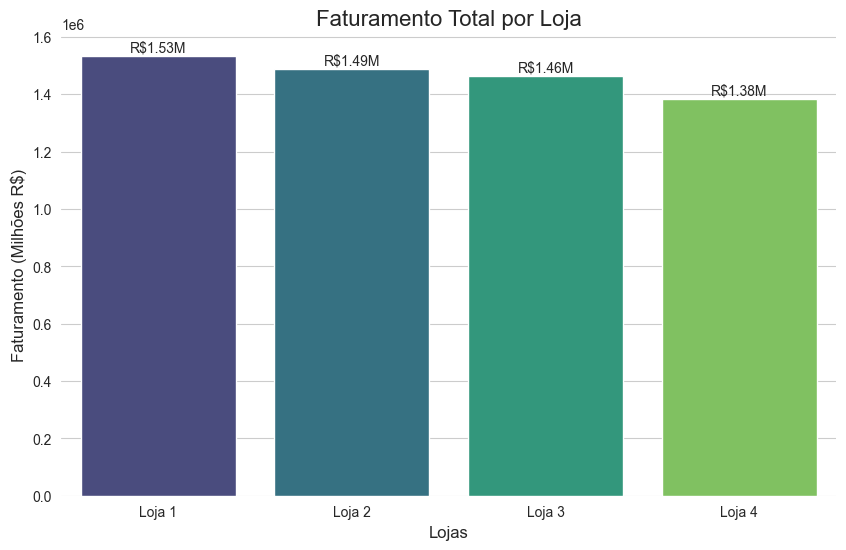

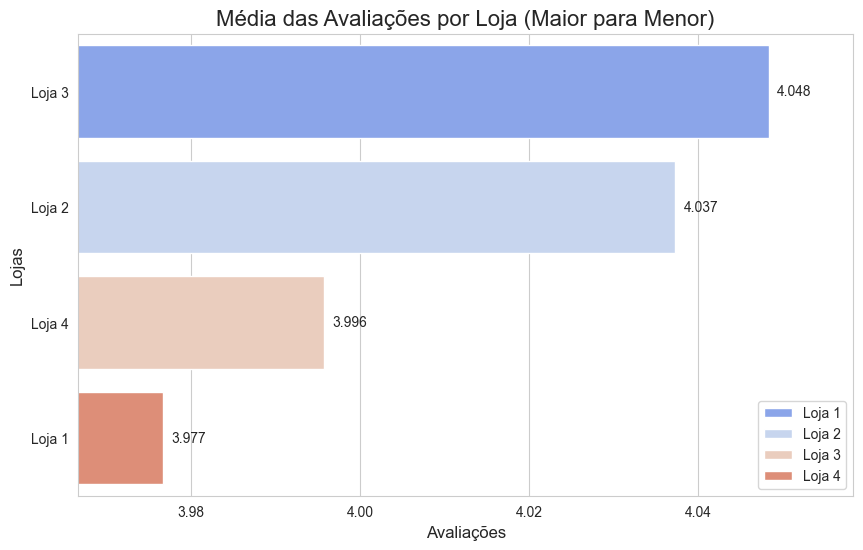

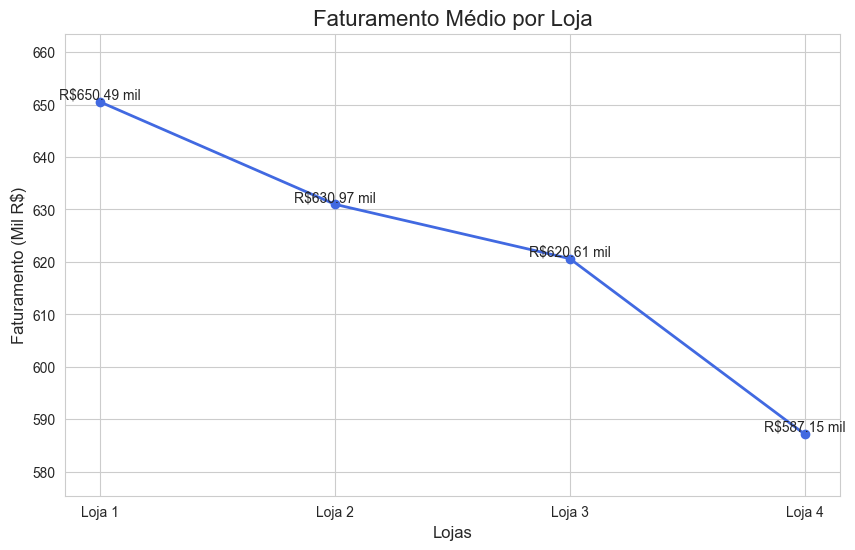

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

x = lojas.keys()

sns.set_style("whitegrid")

# --------------------------------------------------------------------------------

plt.figure(figsize=(10,6))
ax = sns.barplot(x=x, y=faturamento, palette="viridis", hue=x)

sns.despine(left=True, bottom=True)

plt.title("Faturamento Total por Loja", fontsize=16)
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento (Milhões R$)", fontsize=12)

for i, valor in enumerate(faturamento):
  valor_milhoes = valor / 1_000_000
  plt.text(i, valor + max(faturamento)*0.01, f'R${valor_milhoes:.2f}M', ha='center', fontsize=10)

plt.show()


# --------------------------------------------------------------------------------

ordenados = sorted(zip(medias, x), reverse=True)
medias_ordenadas, lojas_ordenadas = zip(*ordenados)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=medias_ordenadas, y=lojas_ordenadas, palette="coolwarm", hue=x)

for i, valor in enumerate(medias_ordenadas):
  plt.text(valor + 0.001, i, f'{valor:.3f}', va='center', fontsize=10)

plt.title("Média das Avaliações por Loja (Maior para Menor)", fontsize=16)
plt.xlabel("Avaliações", fontsize=12)
plt.ylabel("Lojas", fontsize=12)

plt.xlim(min(medias_ordenadas)-0.01, max(medias_ordenadas)+0.01)

plt.show()


# --------------------------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(x, faturamento_medio, marker='o', color='royalblue', linewidth=2)

for i, valor in enumerate(faturamento_medio):
  valor_milhoes = valor / 1
  plt.text(i, valor, f'R${valor_milhoes:.2f} mil', ha='center', va='bottom', fontsize=10)

plt.title("Faturamento Médio por Loja", fontsize=16)
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento (Mil R$)", fontsize=12)

plt.ylim(min(faturamento_medio)*0.98, max(faturamento_medio)*1.02)

plt.show()

END